In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import scipy.stats

In [43]:
sctrials = ['SC_Tr_1','SC_Tr_2','SC_Tr_3','SC_Tr_4','SC_Tr_5','SC_Tr_6','SC_Tr_7','SC_Tr_8','SC_Tr_9','SC_Tr_10','SC_Tr_11','SC_Tr_12']
sctr = [0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(0,12):
    sctr[i]=np.array(pd.read_table(sctrials[i]))
for i in range(0,12):
    for j in range(0,len(sctr[i])):
        sctr[i][j,1]=sctr[i][j,1]/1000000000

In [174]:
e = 1.6022e-19
temps = [24.8, 41.4, 56.4, 72, 91.6, 109, 131.4, 31, 46.9,59.5,78.2,93.3]
Ts = np.zeros(12)
for i in range(0,12):
    Ts[i]= 273.15+temps[i]
def IV(x,I,k):
    return I*(np.exp(e*x/(1*k*T))-1)
def fittoIV(data,guesses,a,b,col,title):
    #plt.figure(figsize=(10,5))
    x = data[a:b,0]
    y = data[a:b,1]
    init_vals = [guesses[0],guesses[1]]
    best_vals,covar = curve_fit(IV,x,y,p0=init_vals)
    x1 = np.linspace(data[a,0],data[b,0],100)
    #x1 = np.linspace(0,data[len(data)-1,0],100)
    y1 = np.zeros(100)
    for i in range(0,100):
        y1[i]=IV(x1[i],best_vals[0],best_vals[1])
    plt.plot(x1,y1,col)
    plt.title(title,size=15)
    plt.xlabel('$V_{BE}$ (V)',size=15)
    plt.ylabel('$I_c$ (A)',size=15)
    plt.scatter(data[a:b,0],data[a:b,1],c='black',s=1)
    err = np.sqrt(np.diag(covar))
    return best_vals,err

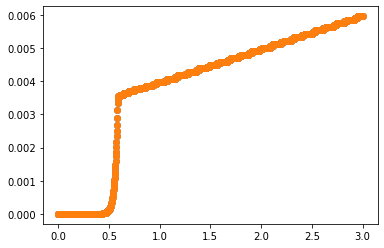

In [4]:
plt.scatter(sctr[0][:,0],sctr[0][:,1])
plt.scatter(sctr[0][:,0],sctr[0][:,1])

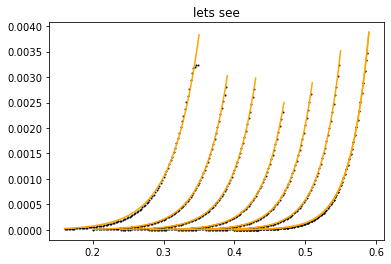

In [5]:
T = Ts[0]
fits = [0,0,0,0,0,0,0]
for i in range(0,7):
    T = Ts[i]
    fits[i] = fittoIV(sctr[i],[.00001,0.00000000000000000001],200-20*i,295-20*i,'orange','lets see')
fittoIV(sctr[0],[.00001,0.00000000000000000001],200,295,'orange','lets see')
ks = [0,0,0,0,0,0,0]
for i in range(0,7):
    ks[i] = fits[i][0][1]

In [258]:
print(Ts[6],Ts[8],Ts[9])
print(Ts)

404.54999999999995 320.04999999999995 332.65
[297.95 314.55 329.55 345.15 364.75 382.15 404.55 304.15 320.05 332.65
 351.35 366.45]


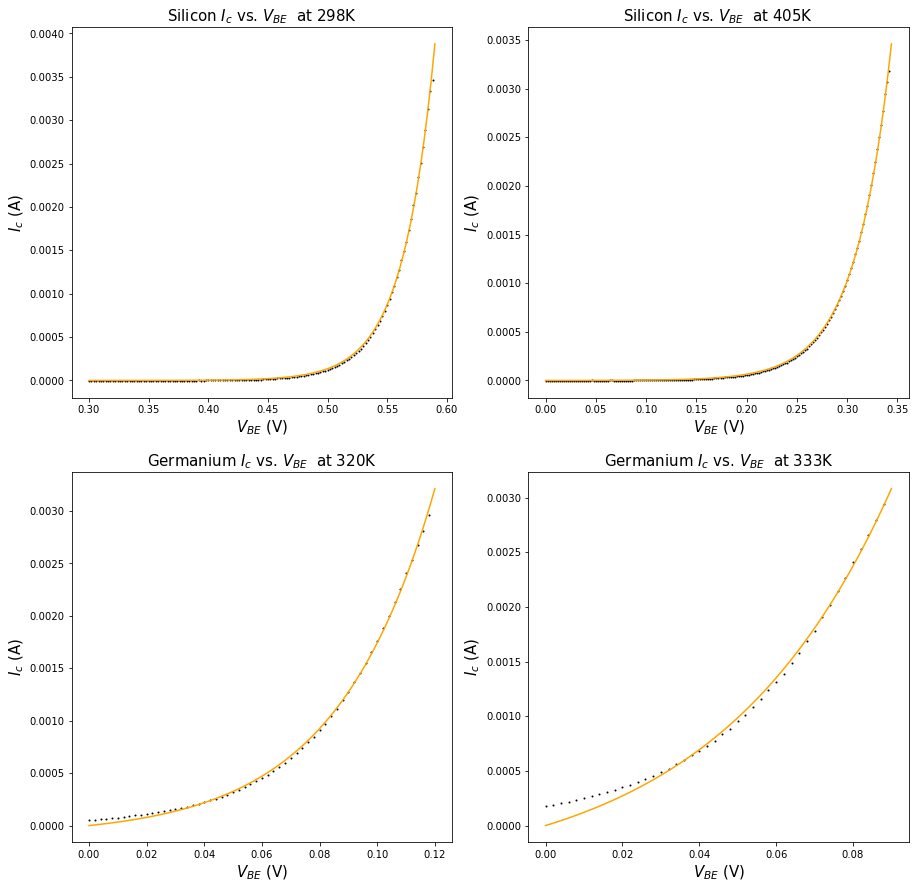

In [261]:
plt.figure(figsize = (15,15))
plt.subplot(2,2,1)
T = Ts[0]
fit1=fittoIV(sctr[0],[0.1,1e-23],150,295,'orange','Silicon $I_c$ vs. $V_{BE}$  at 298K')
plt.subplot(2,2,2)
T = Ts[6]
fit7=fittoIV(sctr[6],[0.1,1e-23],0,172,'orange','Silicon $I_c$ vs. $V_{BE}$  at 405K')
plt.subplot(2,2,3)
T = Ts[8]
fit9=fittoIV(sctr[8],[0.1,1e-23],0,60,'orange','Germanium $I_c$ vs. $V_{BE}$  at 320K')
plt.subplot(2,2,4)
T = Ts[9]
fit10=fittoIV(sctr[9],[0.1,1e-23],0,45,'orange','Germanium $I_c$ vs. $V_{BE}$  at 333K')

(array([1.02644831e-11, 1.42563115e-23]),
 array([3.77045571e-13, 2.73880517e-26]))

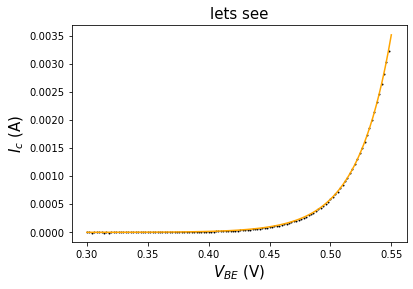

In [176]:
T = Ts[1]
fit2=fittoIV(sctr[1],[0.1,1e-23],150,275,'orange','lets see')
fit2

(array([9.18967300e-11, 1.43770639e-23]),
 array([2.92184229e-12, 2.69056249e-26]))

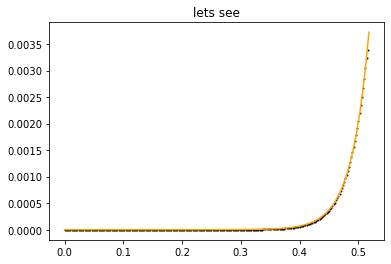

In [128]:
T = Ts[2]
fit3=fittoIV(sctr[2],[0.1,1e-23],0,259,'orange','lets see')
fit3

(array([5.44917138e-10, 1.42358568e-23]),
 array([1.11151389e-11, 1.91964194e-26]))

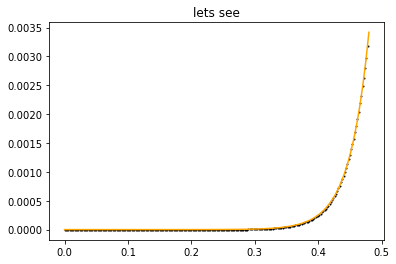

In [129]:
T = Ts[3]
fit4=fittoIV(sctr[3],[0.1,1e-23],0,240,'orange','lets see')
fit4

(array([5.02557997e-09, 1.42159303e-23]),
 array([9.42952269e-11, 2.06956445e-26]))

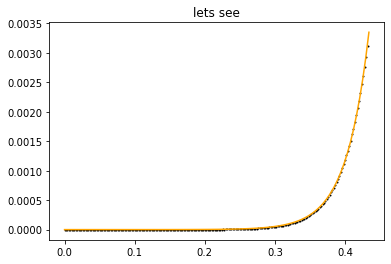

In [130]:
T = Ts[4]
fit5=fittoIV(sctr[4],[0.1,1e-23],0,217,'orange','lets see')
fit5

(array([3.42296045e-08, 1.43751156e-23]),
 array([9.50924912e-10, 3.62015618e-26]))

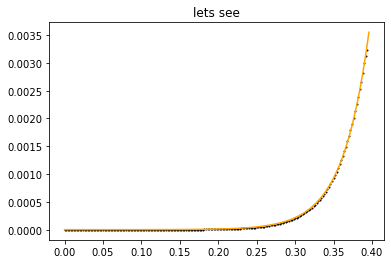

In [131]:
T = Ts[5]
fit6=fittoIV(sctr[5],[0.1,1e-23],0,198,'orange','lets see')
fit6

(array([2.58565841e-07, 1.43382215e-23]),
 array([5.04676454e-09, 3.11332420e-26]))

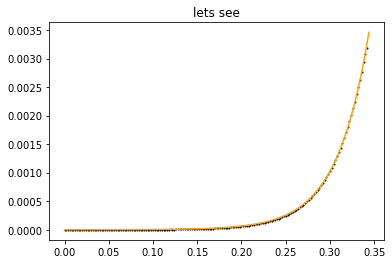

In [132]:
T = Ts[6]
fit7=fittoIV(sctr[6],[0.1,1e-23],0,172,'orange','lets see')
fit7

(array([1.74253761e-05, 1.57763350e-23]),
 array([4.50033751e-07, 8.56972476e-26]))

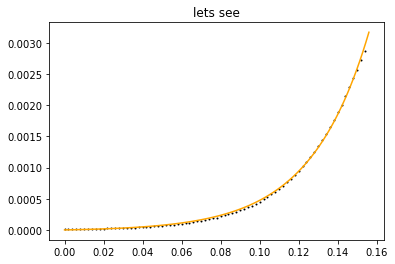

In [147]:
T = Ts[7]
fit8=fittoIV(sctr[7],[0.1,1e-23],0,78,'orange','lets see')
fit8

(array([9.76282903e-05, 1.70482350e-23]),
 array([2.55346677e-06, 1.38416953e-25]))

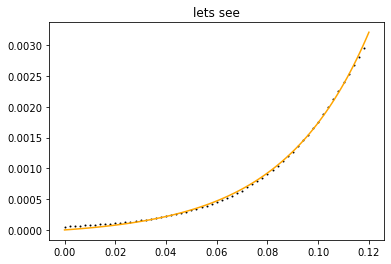

In [148]:
T = Ts[8]
fit9=fittoIV(sctr[8],[0.1,1e-23],0,60,'orange','lets see')
fit9

(array([4.88229000e-04, 2.17894104e-23]),
 array([3.70853762e-05, 8.12288926e-25]))

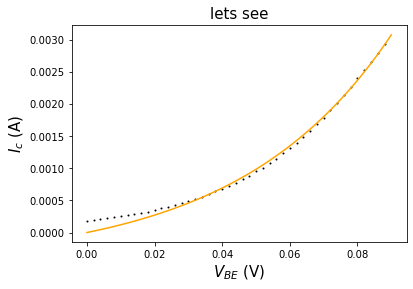

In [251]:
T = Ts[9]
fit10=fittoIV(sctr[9],[0.1,1e-23],0,45,'orange','lets see')
#plt.scatter(sctr[9][:,0],sctr[9][:,1])
fit10

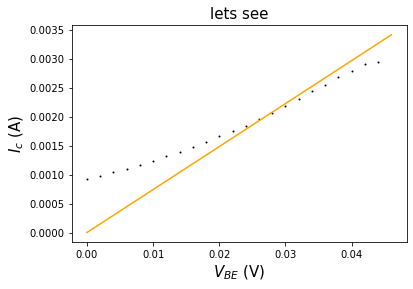

In [252]:
T = Ts[10]
fit11=fittoIV(sctr[10],[0.1,1e-23],0,23,'orange','lets see')
#plt.scatter(sctr[10][:,0],sctr[10][:,1])

In [222]:
def line(x,a,b):
    return a*(x-b)
def fittoline(data,guesses,a,b,col,title):
    x = data[a:b][0]
    y = data[a:b][1]
    init_vals = [guesses[0],guesses[1]]
    best_vals,covar = curve_fit(line,x,y,p0=init_vals)
    x1 = np.linspace(data[0][a],data[0][b],100)
    #x1 = np.linspace(0,data[len(data)-1,0],100)
    y1 = np.zeros(100)
    for i in range(0,100):
        y1[i]=line(x1[i],best_vals[0],best_vals[1])
    plt.plot(x1,y1,col)
    plt.title(title)
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current (A)')
    plt.scatter(data[:][0],data[:][1],c='black',s=2)
    err = np.sqrt(np.diag(covar))
    return best_vals,err

In [244]:
def fittoline(x,y,guesses,a,b,col,title):
    init_vals = [guesses[0],guesses[1]]
    best_vals,covar = curve_fit(line,x,y,p0=init_vals)
    x1 = np.linspace(x[a],x[b],100)
    #x1 = np.linspace(0,data[len(data)-1,0],100)
    y1 = np.zeros(100)
    for i in range(0,100):
        y1[i]=line(x1[i],best_vals[0],best_vals[1])
    plt.plot(x1,y1,col)
    plt.title(title,size =15)
    plt.xlabel('1/T ($K^{-1}$)',size=15)
    plt.ylabel('$ln(I_0)$  (lnA)',size=15)
    plt.scatter(x[:],y[:],c='black',s=2)
    err = np.sqrt(np.diag(covar))
    return best_vals,err

In [194]:
fitsi = [fit1[0][0],fit2[0][0],fit3[0][0],fit4[0][0],fit5[0][0],fit6[0][0],fit7[0][0],fit8[0][0],fit9[0][0],fit10[0][0],fit11[0][0]]
errsi = [fit1[1][0],fit2[1][0],fit3[1][0],fit4[1][0],fit5[1][0],fit6[1][0],fit7[1][0],fit8[1][0],fit9[1][0],fit10[1][0],fit11[1][0]]
ks = [fit1[0][1],fit2[0][1],fit3[0][1],fit4[0][1],fit5[0][1],fit6[0][1],fit7[0][1],fit8[0][1],fit9[0][1],fit10[0][1],fit11[0][1]]
kerrs = [fit1[1][1],fit2[1][1],fit3[1][1],fit4[1][1],fit5[1][1],fit6[1][1],fit7[1][1],fit8[1][1],fit9[1][1],fit10[1][1],fit11[1][1]]
errbar=np.zeros(len(errsi))
for i in range(0,len(errsi)):
    errbar[i]=errsi[i]/fitsi[i]
#plt.scatter(fitsi[0:7],Ts[0:7])
#plt.xscale('log')
#plt.xlabel('Saturation Current (A)')
#plt.ylabel('Temperature (K)')
kval = np.mean(ks[0:7])
kerr = (1/7)*np.sqrt(kerrs[0]**2+kerrs[1]**2+kerrs[2]**2+kerrs[3]**2+kerrs[4]**2+kerrs[5]**2+kerrs[6]**2)
print(kval,kerr)

1.431690032858882e-23 1.160815787410501e-26


Text(0, 0.5, '$ln(I_0)$  (lnA)')

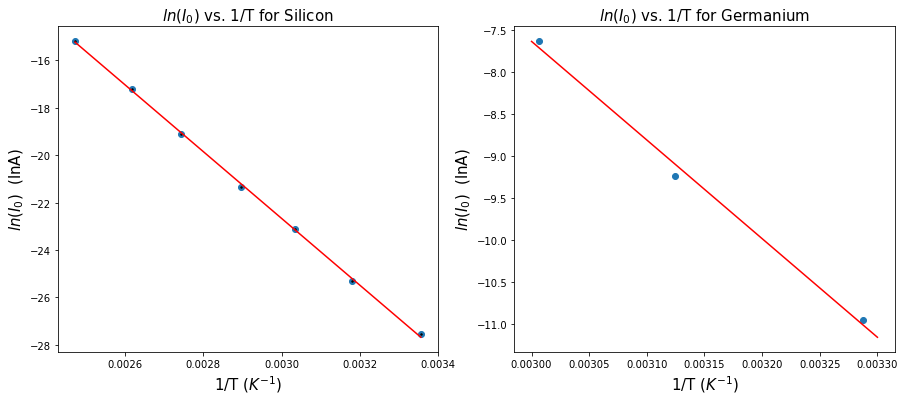

In [269]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.scatter(1/(Ts[0:7]),np.log(fitsi[0:7]))
plt.xlabel('1/T ($K^{-1}$)',size=15)
plt.ylabel('$ln(I_0)$  ln(A)',size=15)
fittoline((1/(Ts[0:7])),np.log(fitsi[0:7]),[-14000,0],0,6,'r','$ln(I_0)$ vs. 1/T for Silicon')
plt.subplot(1,2,2)
fitsg=[fit8[0][0],fit9[0][0],fit10[0][0]]
plt.scatter(1/Ts[7:10],np.log(fitsg[0:3]))
#rg = -0.9973894983399078**2
x = np.linspace(.003,.0033,100)
y = np.zeros(100)
for i in range(0,len(y)):
    y[i]=-11753.235585648796*x[i]+27.627166845702455
plt.plot(x,y,'r')
plt.title('$ln(I_0)$ vs. 1/T for Germanium',size = 15)
plt.xlabel('1/T ($K^{-1}$)',size=15)
plt.ylabel('$ln(I_0)$  (lnA)',size=15)

In [270]:
scipy.stats.linregress(1/(Ts[0:7]),np.log(fitsi[0:7]))
rs=-0.9997451557127698**2

In [271]:
scipy.stats.linregress(1/Ts[7:10],np.log(fitsg[0:3]))

LinregressResult(slope=-11753.235585648796, intercept=27.627166845702455, rvalue=-0.9973894983399078, pvalue=0.04600993610165573, stderr=850.9146838899492, intercept_stderr=2.6732607831322346)

Text(0, 0.5, '$ln(I_0)$  (lnA)')

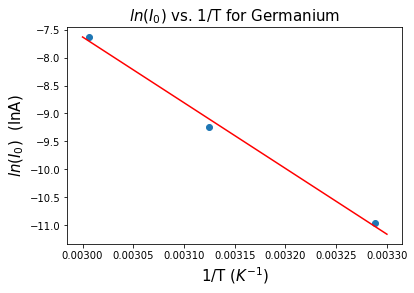

In [272]:
fitsg=[fit8[0][0],fit9[0][0],fit10[0][0]]
plt.scatter(1/Ts[7:10],np.log(fitsg[0:3]))
rg = -0.9973894983399078**2
x = np.linspace(.003,.0033,100)
y = np.zeros(100)
for i in range(0,len(y)):
    y[i]=-11753.235585648796*x[i]+27.627166845702455
plt.plot(x,y,'r')
plt.title('$ln(I_0)$ vs. 1/T for Germanium',size = 15)
plt.xlabel('1/T ($K^{-1}$)',size=15)
plt.ylabel('$ln(I_0)$  (lnA)',size=15)

In [200]:
k = 1.38064852e-23
sgap = 14086.863551931516*k*6.242e18
sgaperr = 142.25409443905252*k*6.242e18
ggap = 11753.235585648796*k*6.242e18
ggaperr = 850.9146838899492*k*6.242e18
print(sgap,sgaperr)
print(ggap,ggaperr)

1.2140070365658586 0.012259469327055033
1.0128947902982608 0.07333189605701616


In [206]:
print(datag)

[array([304.15, 320.05, 332.65]), array([-10.95758302,  -9.23434325,  -7.624726  ])]


In [273]:
rs,rg

(-0.9994903763711503, -0.9947858113987329)